# Nama : M. Taufiq Qurahman
# Nim : 09011381722092
# Sk5 Palembang
MENGKLASIFIKASIKAN DESA PERKOTAAN DAN DESA
PERDESAAN 

In [52]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Input : KPD dibagi menjadi 3 bagian yakni :

    sedikit (0 - 7176)
    sedang (80 - 14271)
    padat (7176 - 20000)
    
PRT dibagi menjadi 3 bagian yakni:

    rendah (0 - 10)
    menengah (0 - 20)
    tinggi (10 - 100)

AFU dibagi menjadi 3 bagian yakni:

    buruk (0 - 4)
    cukup (0 - 7)
    baik (4 - 10)

Output : Status Desa dibagi menjadi 3 bagian yakni :

    Desa Perdesaan Desa (0 - 15)
    Desa Perkotaan Kota (5 - 20)
   

# FUZZYFIKASI KPD

In [53]:
kpd = ctrl.Antecedent(np.arange(0,20000,1),'kpd')
kpd_x = np.arange(0,20000,1)

Untuk kpd,Fungsi keanggotaan dibagi menjadi 3 bagian yakni :
$$Kepadatan PenDuduk$$
$$sedikit (0 - 8600)$$
$$sedang (3500 - 13500)$$
$$padat (8600 - 20000)$$

Dengan fungsi keanggotaan kpd

\begin{equation}
  kpd['sedikit'] = \mu kpdSedikit(x)=\begin{cases}
    1 , & \text{$ x\leq3500$}.\\
    (8600 - x)/(5100) , & \text{$3500 \leq x \leq 8600$}.\\
    0, & \text{$ x\geq8600$}.\\
  \end{cases}
  \\
  kpd['sedang'] = \mu kpdSedang(x)=\begin{cases}
    (x - 3500)/(5100) , & \text{$3500 \leq x \leq 8600$}.\\
    (13500 - x)/(4900) , & \text{$8600 \leq x \leq 13500$}.\\
    0 , & \text{$ x\geq13500 atau x \leq3500$}.\\
  \end{cases}
  \\
  kpd['padat'] = \mu kpdPadat(x)=\begin{cases}
    0 , & \text{$ x\leq8600$}.\\
    (x - 8600)/(4900) , & \text{$8600 \leq x \leq 13500$}.\\
    1 , & \text{$x \geq 13500$}.\\
  \end{cases}
\end{equation}

In [54]:
kpd['sedikit'] = fuzz.trapmf(kpd.universe, [0,0,4500,8600])
kpd['sedang'] = fuzz.trimf(kpd.universe, [3500,8600,13500])
kpd['padat'] = fuzz.trapmf(kpd.universe, [8600,12500,20000,20000])

# PLOTTING FUNGSI KEANGGOTAAN KPD

Plotting Fungsi keanggotaan $$\mu kpdSedikit(x)$$

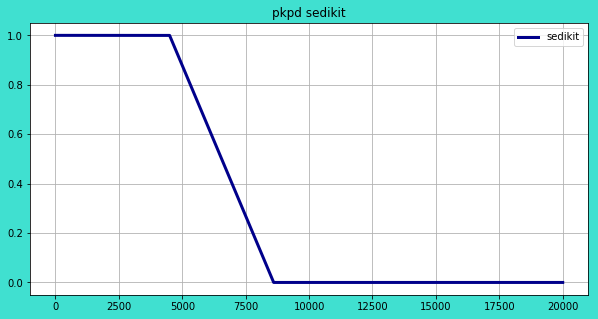

In [55]:
kpd_sedikit = fuzz.trapmf(kpd_x,[0,0,4500,8600])
fig, (ax0) = plt.subplots(nrows=1,facecolor='turquoise',figsize=(10,5))
ax0.plot(kpd_x,kpd_sedikit,'darkblue',linewidth=3,label='sedikit')
ax0.set_title('pkpd sedikit')
ax0.grid()
ax0.legend()

Plotting Fungsi keanggotaan $$\mu kpdSedang(x)$$

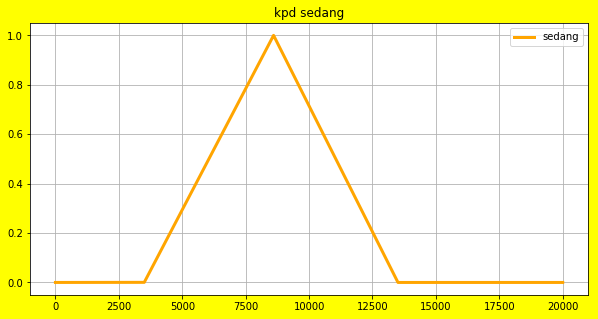

In [56]:
kpd_sedang = fuzz.trimf(kpd_x,[3500,8600,13500])
fig2, (ax1) = plt.subplots(nrows=1,facecolor='yellow',figsize=(10,5))
ax1.plot(kpd_x,kpd_sedang,'orange',linewidth=3,label='sedang')
ax1.set_title('kpd sedang')
ax1.grid()
ax1.legend()

Plotting Fungsi keanggotaan $$\mu kpdPadat(x)$$

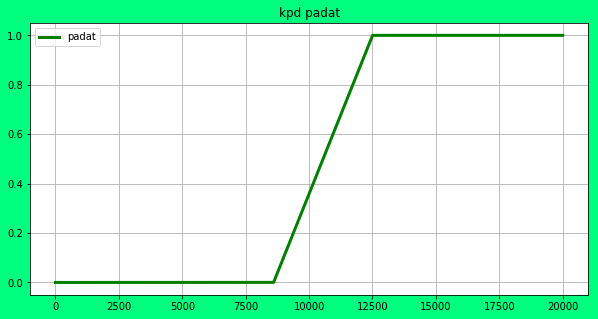

In [57]:
kpd_padat = fuzz.trapmf(kpd_x,[8600,12500,20000,20000])
fig3, (ax2) = plt.subplots(nrows=1,facecolor='springgreen',figsize=(10,5))
ax2.plot(kpd_x,kpd_padat,'green',linewidth=3,label='padat')
ax2.set_title('kpd padat')
ax2.grid()
ax2.legend()

Plotting Fungsi keanggotaan $$\mu KPD(x)$$

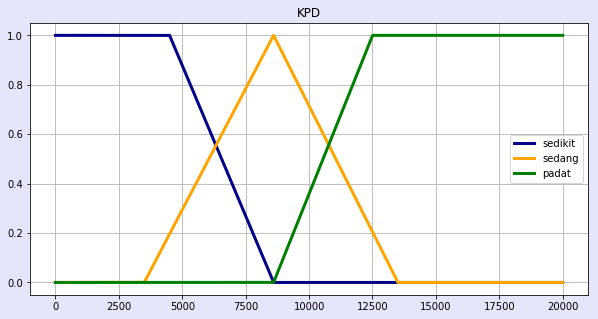

In [58]:
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='lavender', figsize=(10,5))
ax3.plot(kpd_x,kpd_sedikit,'darkblue',linewidth=3,label='sedikit')
ax3.plot(kpd_x,kpd_sedang,'orange',linewidth=3,label='sedang')
ax3.plot(kpd_x,kpd_padat,'green',linewidth=3,label='padat')
ax3.set_title('KPD')
ax3.grid()
ax3.legend()

# FUZZYFIKASI PRT

In [59]:
prt =  ctrl.Antecedent(np.arange(0,100,1), 'prt')
prt_x = np.arange(0,100,1)

Untuk prt,Fungsi keanggotaan dibagi menjadi 3 bagian yakni :
$$Persentasi Rumah Tangga Pertanian$$
$$rendah (0 - 31)$$
$$menengah (10 - 53)$$
$$tinggi (31 - 100)$$

Dengan fungsi keanggotaan prt

\begin{equation}
  prt['rendah'] = \mu prtRendah(x)=\begin{cases}
    1 , & \text{$ x\leq10$}.\\
    (31 - x)/(21) , & \text{$10 \leq x \leq 31$}.\\
    0, & \text{$ x\geq31$}.\\
  \end{cases}
  \\
  prt['menengah'] = \mu prtMenengah(x)=\begin{cases}
    0 , & \text{$ x\leq10  atau  x \geq53$}.\\
    (x - 10)/(21) , & \text{$10 \leq x \leq 31$}.\\
    (53 - x)/(22) , & \text{$31 \leq x \leq 53$}.\\
  \end{cases}
  \\
  prt['tinggi'] = \mu prtTinggi(x)=\begin{cases}
    0 , & \text{$ x\leq31$}.\\
    (x - 31)/(22) , & \text{$31 \leq x \leq 53$}.\\
    1 , & \text{$x \geq 53$}.\\
  \end{cases}
\end{equation}

In [60]:
prt['rendah'] = fuzz.trapmf(prt.universe, [0,0,16,31])
prt['menengah'] = fuzz.trimf(prt.universe, [10,31,53])
prt['tinggi'] = fuzz.trapmf(prt.universe, [31,45,100,100])

# PLOTTING FUNGSI KEANGGOTAAN PRT

Plotting Fungsi keanggotaan $$\mu prtRendah(x)$$

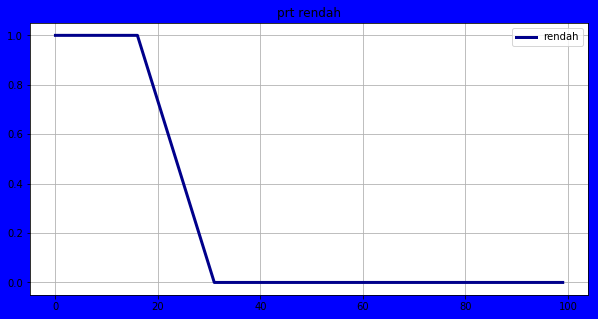

In [61]:
prt_rendah = fuzz.trapmf(prt_x,[0,0,16,31])
fig, (ax0) = plt.subplots(nrows=1,facecolor='blue',figsize=(10,5))
ax0.plot(prt_x,prt_rendah,'darkblue',linewidth=3,label='rendah')
ax0.set_title('prt rendah')
ax0.grid()
ax0.legend()

Plotting Fungsi keanggotaan $$\mu prtMenengah(x)$$

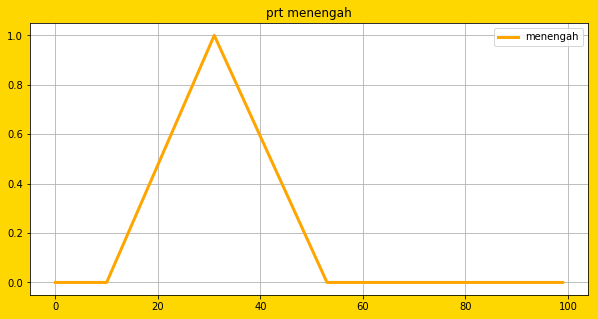

In [62]:
prt_menengah = fuzz.trimf(prt_x,[10,31,53])
fig1, (ax1) = plt.subplots(nrows=1,facecolor='gold',figsize=(10,5))
ax1.plot(prt_x,prt_menengah,'orange',linewidth=3,label='menengah')
ax1.set_title('prt menengah')
ax1.grid()
ax1.legend()

Plotting Fungsi keanggotaan $$\mu prtTinggi$$

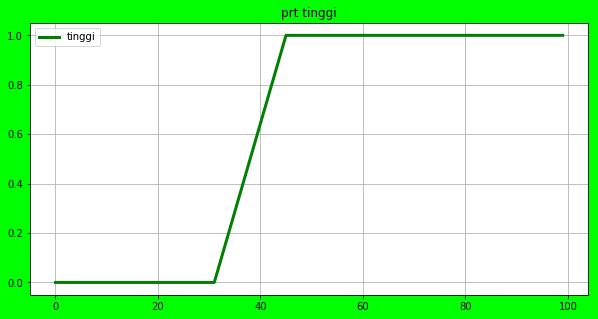

In [63]:
prt_tinggi = fuzz.trapmf(prt_x,[31,45,100,100])
fig3, (ax2) = plt.subplots(nrows=1,facecolor='lime',figsize=(10,5))
ax2.plot(prt_x,prt_tinggi,'green',linewidth=3,label='tinggi')
ax2.set_title('prt tinggi')
ax2.grid()
ax2.legend()

Plotting Fungsi keanggotaan $$\mu PRT(x)$$

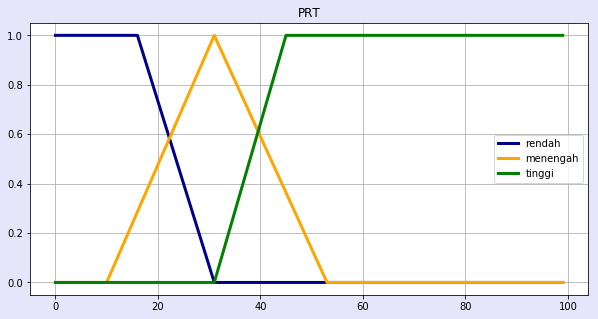

In [64]:
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='lavender', figsize=(10,5))
ax3.plot(prt_x,prt_rendah,'darkblue',linewidth=3,label='rendah')
ax3.plot(prt_x,prt_menengah,'orange',linewidth=3,label='menengah')
ax3.plot(prt_x,prt_tinggi,'green',linewidth=3,label='tinggi')
ax3.set_title('PRT')
ax3.grid()
ax3.legend()

# FUZZYFIKASI AFU

In [65]:
afu =  ctrl.Antecedent(np.arange(0,10,0.5), 'afu')
afu_x = np.arange(0,10,0.5)

Untuk afu,Fungsi keanggotaan dibagi menjadi 3 bagian yakni :
$$Akses Fasilitas Umum$$
$$buruk (0 - 5)$$
$$cukup (2 - 8)$$
$$baik (5 - 11)$$

Dengan fungsi keanggotaan afu

\begin{equation}
  afu['buruk'] = \mu afuBuruk(x)=\begin{cases}
    1 , & \text{$ x\leq2$}.\\
    (5 - x)/(3) , & \text{$2 \leq x \leq 5$}.\\
    0, & \text{$ x\geq5$}.\\
  \end{cases}
  \\
  afu['cukup'] = \mu afuCukup(x)=\begin{cases}
    0 , & \text{$ x\leq2  atau  x \geq8$}.\\
    (x - 2)/(3) , & \text{$2 \leq x \leq 5$}.\\
    (8 - x)/(3) , & \text{$5 \leq x \leq 8$}.\\
  \end{cases}
  \\
  afu['baik'] = \mu afuBaik(x)=\begin{cases}
    0 , & \text{$ x\leq5$}.\\
    (x - 5)/(3) , & \text{$5 \leq x \leq 8$}.\\
    1 , & \text{$x \geq8$}.\\
  \end{cases}
\end{equation}

In [66]:
afu['buruk'] = fuzz.trapmf(afu.universe, [0,0,3,5])
afu['cukup'] = fuzz.trimf(afu.universe, [2,5,8])
afu['baik'] = fuzz.trapmf(afu.universe, [5,7,11,11])

# PLOTTING FUNGSI KEANGGOTAAN AFU

Plotting Fungsi keanggotaan $$\mu afuBuruk(x)$$

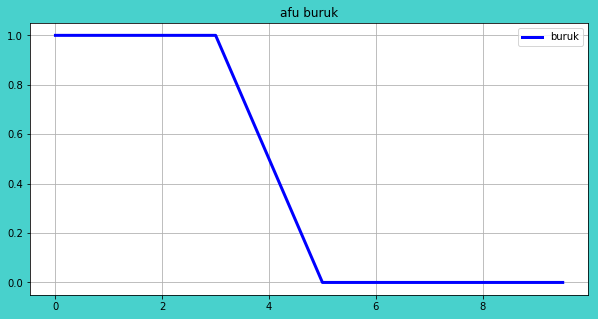

In [68]:
afu_buruk = fuzz.trapmf(afu_x,[0,0,3,5])
fig, (ax0) = plt.subplots(nrows=1,facecolor='mediumturquoise',figsize=(10,5))
ax0.plot(afu_x,afu_buruk,'blue',linewidth=3,label='buruk')
ax0.set_title('afu buruk')
ax0.grid()
ax0.legend()

Plotting Fungsi keanggotaan $$\mu afuCukup(x)$$

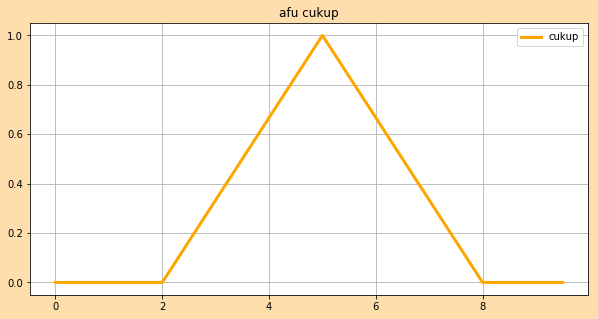

In [70]:
afu_cukup = fuzz.trimf(afu_x,[2,5,8])
fig2, (ax1) = plt.subplots(nrows=1,facecolor='navajowhite',figsize=(10,5))
ax1.plot(afu_x,afu_cukup,'orange',linewidth=3,label='cukup')
ax1.set_title('afu cukup')
ax1.grid()
ax1.legend()

Plotting Fungsi keanggotaan $$\mu afuBaik(x)$$

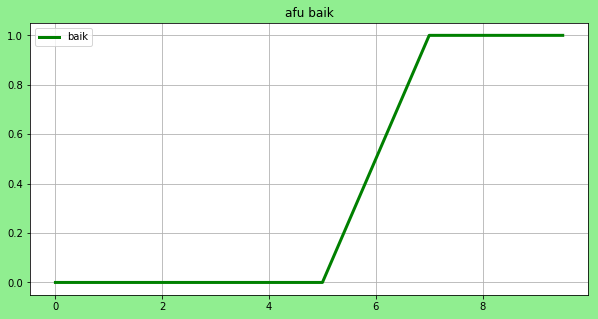

In [71]:
afu_baik = fuzz.trapmf(afu_x,[5,7,10,10])
fig3, (ax2) = plt.subplots(nrows=1,facecolor='lightgreen',figsize=(10,5))
ax2.plot(afu_x,afu_baik,'green',linewidth=3,label='baik')
ax2.set_title('afu baik')
ax2.grid()
ax2.legend()

Plotting Fungsi keanggotaan $$\mu AFU(x)$$

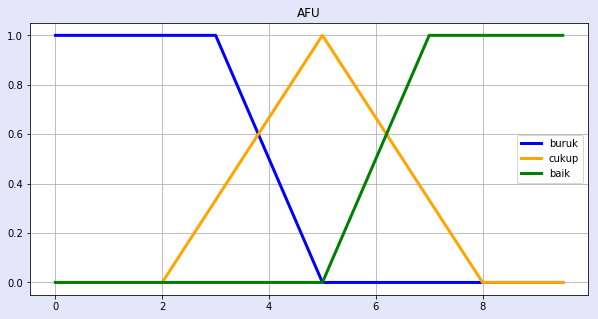

In [72]:
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='lavender', figsize=(10,5))
ax3.plot(afu_x,afu_buruk,'blue',linewidth=3,label='buruk')
ax3.plot(afu_x,afu_cukup,'orange',linewidth=3,label='cukup')
ax3.plot(afu_x,afu_baik,'green',linewidth=3,label='baik')
ax3.set_title('AFU')
ax3.grid()
ax3.legend()

# FUZZYFIKASI STATUS DESA

In [73]:
sd =ctrl.Consequent(np.arange(0,20,1), 'status desa')
sd_x = np.arange(0,20,1)

Fungsi keanggotaan variabel status desa :
$$Desa Perdesaan (0 - 15)$$
$$Desa Perkotaan (5 - 20)$$

Dengan fungsi keanggotaan afu

\begin{equation}
  sd['Desa Perdesaan'] = \mu sdDesa Perdesaan(x)=\begin{cases}
    1 , & \text{$ z\leq5$}.\\
    (15 - z)/(10) , & \text{$5 \leq z \leq 15$}.\\
    0, & \text{$ z\geq15$}.\\
  \end{cases}
  \\
  sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
\end{equation}

Deklarasi Untuk variabel Output

In [101]:
sd['perdesaan'] = fuzz.trapmf(sd.universe, [0,0,7,15])
sd['perkotaan'] = fuzz.trapmf(sd.universe, [5,12,20,20])

# PLOTTING FUNGSI KEANGGOTAAN STATUS DESA

Plotting Fungsi keanggotaan $$\mu sdPerdesaan(x)$$

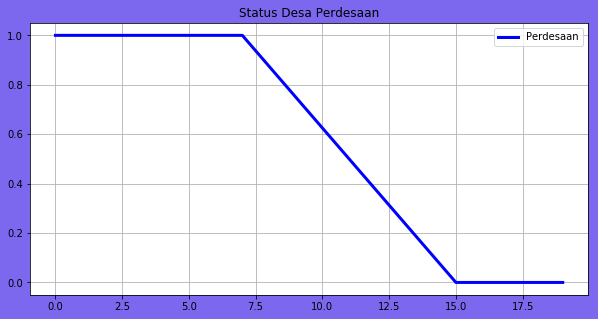

In [75]:
sd_perdesaan = fuzz.trapmf(sd_x,[0,0,7,15])
fig,(ax0)= plt.subplots(nrows=1,facecolor='mediumslateblue',figsize=(10,5))
ax0.plot(sd_x,sd_perdesaan,'blue',linewidth=3,label='Perdesaan')
ax0.set_title('Status Desa Perdesaan')
ax0.grid()
ax0.legend()

Plotting Fungsi keanggotaan $$\mu sdPerkotaan(x)$$

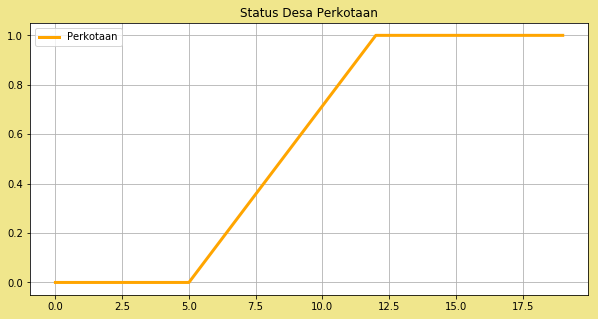

In [76]:
sd_perkotaan = fuzz.trapmf(sd_x,[5,12,20,20])
fig2,(ax1)= plt.subplots(nrows=1,facecolor='khaki',figsize=(10,5))
ax1.plot(sd_x,sd_perkotaan,'orange',linewidth=3,label='Perkotaan')
ax1.set_title('Status Desa Perkotaan')
ax1.grid()
ax1.legend()

Plotting Fungsi keanggotaan $$\mu StatusDesa(x)$$

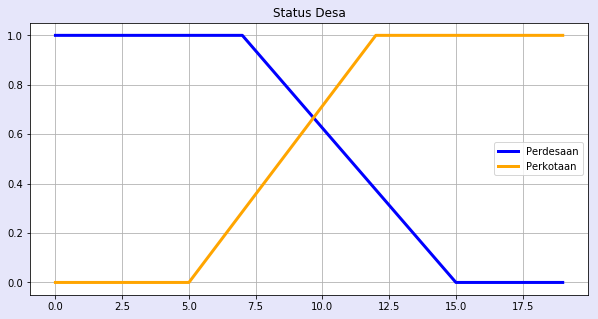

In [103]:
fig, (ax2) = plt.subplots(nrows= 1 ,facecolor='lavender', figsize=(10,5))
ax2.plot(sd_x,sd_perdesaan,'blue',linewidth=3,label='Perdesaan')
ax2.plot(sd_x,sd_perkotaan,'orange',linewidth=3,label='Perkotaan')
ax2.set_title('Status Desa')
ax2.grid()
ax2.legend()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel KPD yang berjumlah 3, variabel PRT yang berjumlah 3 dan fuzzifikasi dari variabel AFU yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 x 3 = 27 rule

1. IF kpd sedikit dan prt menengah dan afu buruk  Then  sd perdesaan
2. IF kpd sedikit dan prt tinggi dan afu buruk  Then  sd perdesaan
3. IF kpd sedang dan prt tinggi dan afu buruk  Then  sd perdesaan
4. IF kpd padat dan prt tinggi dan afu buruk  Then  sd perdesaan
5. IF kpd sedikit dan prt rendah dan afu buruk  Then  sd perkotaan
6. IF kpd sedikit dan prt rendah dan afu cukup  Then  sd perkotaan
7. IF kpd sedikit dan prt rendah dan afu baik  Then sd perkotaan
8. IF kpd sedikit dan prt menengah dan afu cukup  Then  sd perkotaan
9. IF kpd sedikit dan prt menengah dan afu baik  Then sd perkotaan
0. IF kpd sedikit dan prt tinggi dan afu cukup  Then  sd perkotaan
1. IF kpd sedikit dan prt tinggi dan afu baik  Then sd perkotaan
2. IF kpd sedang dan prt rendah dan afu buruk  Then  sd perkotaan
3. IF kpd sedang dan prt rendah dan afu cukup  Then  sd perkotaan
4. IF kpd sedang dan prt rendah dan afu baik  Then sd perkotaan
5. IF kpd sedang dan prt menengah dan afu buruk  Then  sd perkotaan
6. IF kpd sedang dan prt menengah dan afu cukup  Then  sd perkotaan
7. IF kpd sedang dan prt menengah dan afu baik  Then sd perkotaan
8. IF kpd sedang dan prt tinggi dan afu cukup  Then  sd perkotaan
9. IF kpd sedang dan prt tinggi dan afu baik  Then sd perkotaan
0. IF kpd padat dan prt rendah dan afu buruk  Then  sd perkotaan
1. IF kpd padat dan prt rendah dan afu cukup  Then  sd perkotaan
2. IF kpd padat dan prt rendah dan afu baik  Then sd perkotaan
3. IF kpd padat dan prt menengah dan afu buruk  Then  sd perkotaan
4. IF kpd padat dan prt menengah dan afu cukup  Then  sd perkotaan
5. IF kpd padat dan prt menengah dan afu baik  Then sd perkotaan
6. IF kpd padat dan prt tinggi dan afu cukup  Then  sd perkotaan
7. IF kpd padat dan prt tinggi dan afu baik  Then sd perkotaan

In [79]:
rule01 = ctrl.Rule(kpd['sedikit']  & prt['menengah'] &afu['buruk']   , sd['perdesaan'])
rule02 = ctrl.Rule(kpd['sedikit']  & prt['tinggi'] &afu['buruk']   , sd['perdesaan'])
rule03 = ctrl.Rule(kpd['sedang']  & prt['tinggi'] &afu['buruk']   , sd['perdesaan'])
rule04 = ctrl.Rule(kpd['padat']  & prt['tinggi'] &afu['buruk']   , sd['perdesaan'])
rule05 = ctrl.Rule(kpd['sedikit']  & prt['rendah'] &afu['buruk']   , sd['perkotaan'])
rule06 = ctrl.Rule(kpd['sedikit']  & prt['rendah'] &afu['cukup']   , sd['perkotaan'])
rule07 = ctrl.Rule(kpd['sedikit']  & prt['rendah'] &afu['baik']   , sd['perkotaan'])
rule08 = ctrl.Rule(kpd['sedikit']  & prt['menengah'] &afu['cukup']   , sd['perkotaan'])
rule09 = ctrl.Rule(kpd['sedikit']  & prt['menengah'] &afu['baik']   , sd['perkotaan'])
rule10 = ctrl.Rule(kpd['sedikit']  & prt['tinggi'] &afu['cukup']   , sd['perkotaan'])
rule11 = ctrl.Rule(kpd['sedikit']  & prt['tinggi'] &afu['baik']   , sd['perkotaan'])
rule12 = ctrl.Rule(kpd['sedang']  & prt['rendah'] &afu['buruk']   , sd['perkotaan'])
rule13 = ctrl.Rule(kpd['sedang']  & prt['rendah'] &afu['cukup']   , sd['perkotaan'])
rule14 = ctrl.Rule(kpd['sedang']  & prt['rendah'] &afu['baik']   , sd['perkotaan'])
rule15 = ctrl.Rule(kpd['sedang']  & prt['menengah'] &afu['buruk']   , sd['perkotaan'])
rule16 = ctrl.Rule(kpd['sedang']  & prt['menengah'] &afu['cukup']   , sd['perkotaan'])
rule17 = ctrl.Rule(kpd['sedang']  & prt['menengah'] &afu['baik']   , sd['perkotaan'])
rule18 = ctrl.Rule(kpd['sedang']  & prt['tinggi'] &afu['cukup']   , sd['perkotaan'])
rule19 = ctrl.Rule(kpd['sedang']  & prt['tinggi'] &afu['baik']   , sd['perkotaan'])
rule20 = ctrl.Rule(kpd['padat']  & prt['rendah'] &afu['buruk']   , sd['perkotaan'])
rule21 = ctrl.Rule(kpd['padat']  & prt['rendah'] &afu['cukup']   , sd['perkotaan'])
rule22 = ctrl.Rule(kpd['padat']  & prt['rendah'] &afu['baik']   , sd['perkotaan'])
rule23 = ctrl.Rule(kpd['padat']  & prt['menengah'] &afu['buruk']   , sd['perkotaan'])
rule24 = ctrl.Rule(kpd['padat']  & prt['menengah'] &afu['cukup']   , sd['perkotaan'])
rule25 = ctrl.Rule(kpd['padat']  & prt['menengah'] &afu['baik']   , sd['perkotaan'])
rule26 = ctrl.Rule(kpd['padat']  & prt['tinggi'] &afu['cukup']   , sd['perkotaan'])
rule27 = ctrl.Rule(kpd['padat']  & prt['tinggi'] &afu['baik']   , sd['perkotaan'])

# RULE EVALUATION

In [80]:
status_ctrl = ctrl.ControlSystem([rule01,rule02,rule03,rule04,rule05,rule06,rule07,rule08,rule09,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])

C:\Users\Taufiq\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


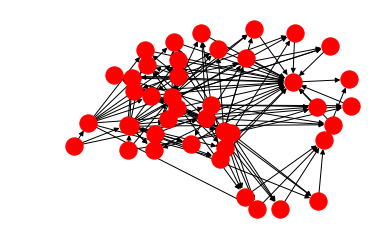

In [81]:
status_ctrl.view()

# DEFUZZYFIKASI

In [82]:
statuss = ctrl.ControlSystemSimulation(status_ctrl)

memasukan nilai input untuk setiap anggota input dan melakukan perhitungan ,.

Untuk input kpd kita masukkan nilai 3750, untuk prt kita masukkan 28, dan untuk afu kita masukkan nilai input 7

In [83]:
statuss.input['kpd'] = 3750
statuss.input['prt'] = 28
statuss.input['afu'] = 7
statuss.compute()

Menampilkan hasil perhtungan 

In [84]:
print(statuss.output['status desa'])

13.363636363636365


Plotting fungsi keanggotaan kpd setelah dimasukkan nilai input pada kpd

C:\Users\Taufiq\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


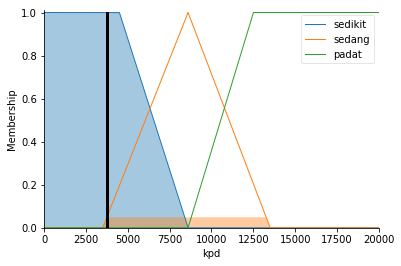

In [94]:
kpd.view(sim=statuss)

Plotting fungsi keanggotaan prt setelah dimasukkan nilai input pada prt

C:\Users\Taufiq\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


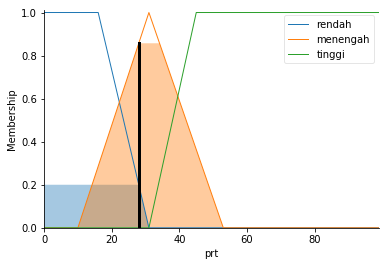

In [95]:
prt.view(sim=statuss)

Plotting fungsi keanggotaan afu setalah dimasukkan nilai input pada afu

C:\Users\Taufiq\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


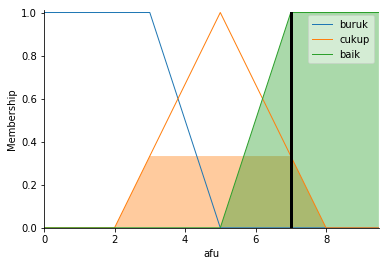

In [98]:
afu.view(sim=statuss)

Plotting fungsi keanggotaan sd setalah dilakukan perhitungan defuzzyfikasi output nilai sd

C:\Users\Taufiq\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


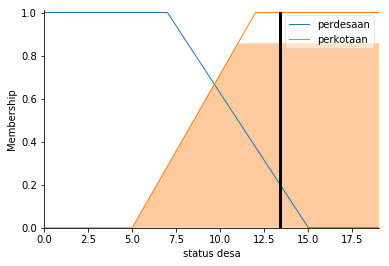

In [99]:
sd.view(sim=statuss)

# PERHITUNGAN MANUAL

\begin{equation}
kpd =3750 \\
    Masukkan\,nilai\,kpd\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,kpd\\
   kpd['sedikit'] = \mu kpdSedikit(x)=\begin{cases}
    1 , & \text{$ x\leq3500$}.\\
    (8600 - x)/(5100) , & \text{$3500 \leq x \leq 8600$}.\checkmark\\
    0, & \text{$ x\geq8600$}.\\
  \end{cases}
  \\
  kpd['sedang'] = \mu kpdSedang(x)=\begin{cases}
    (x - 3500)/(5100) , & \text{$3500 \leq x \leq 8600$}.\checkmark\\
    (13500 - x)/(4900) , & \text{$8600 \leq x \leq 13500$}.\\
    0 , & \text{$ x\geq13500 atau x \leq3500$}.\\
  \end{cases}
  \\
  kpd['padat'] = \mu kpdPadat(x)=\begin{cases}
    0 , & \text{$ x\leq8600$}.\\
    (x - 8600)/(4900) , & \text{$8600 \leq x \leq 13500$}.\\
    1 , & \text{$x \geq 13500$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu kpdSedikit(2500) = (8600 - 3750) / (5100) \\
    \mu kpdSedikit(2500) = 0.95 \\ 
    \mu kpdSedang(2500) = (3750 - 3500) / (5100) \\
    \mu kpdSedang(2500) = 0.05 \\
\end{equation}

\begin{equation}
prt =28 \\
    Masukkan\,nilai\,prt\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,prt\\
   prt['rendah'] = \mu prtRendah(x)=\begin{cases}
    1 , & \text{$ x\leq10$}.\\
    (31 - x)/(21) , & \text{$10 \leq x \leq 31$}.\checkmark\\
    0, & \text{$ x\geq31$}.\\
  \end{cases}
  \\
  prt['menengah'] = \mu prtMenengah(x)=\begin{cases}
    0 , & \text{$ x\leq10  atau  x \geq53$}.\\
    (x - 10)/(21) , & \text{$10 \leq x \leq 31$}.\checkmark\\
    (53 - x)/(22) , & \text{$31 \leq x \leq 53$}.\\
  \end{cases}
  \\
  prt['tinggi'] = \mu prtTinggi(x)=\begin{cases}
    0 , & \text{$ x\leq31$}.\\
    (x - 31)/(22) , & \text{$31 \leq x \leq 53$}.\\
    1 , & \text{$x \geq 53$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu prtRendah(28) = (31 - 28) / (21) \\
    \mu prtRendah(28) = 0.14 \\ 
    \mu prtMenengah(28) = (28 - 10) / (21) \\
    \mu prtMenengah(28) = 0.85 \\ 
\end{equation}

\begin{equation}
afu =7 \\
    Masukkan\,nilai\,afu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,afu\\
  afu['buruk'] = \mu afuBuruk(x)=\begin{cases}
    1 , & \text{$ x\leq2$}.\\
    (5 - x)/(3) , & \text{$2 \leq x \leq 5$}.\\
    0, & \text{$ x\geq5$}.\\
  \end{cases}
  \\
  afu['cukup'] = \mu afuCukup(x)=\begin{cases}
    0 , & \text{$ x\leq2  atau  x \geq8$}.\\
    (x - 2)/(3) , & \text{$2 \leq x \leq 5$}.\\
    (8 - x)/(3) , & \text{$5 \leq x \leq 8$}.\checkmark\\
  \end{cases}
  \\
  afu['baik'] = \mu afuBaik(x)=\begin{cases}
    0 , & \text{$ x\leq5$}.\\
    (x - 5)/(3) , & \text{$5 \leq x \leq 8$}.\checkmark\\
    1 , & \text{$x \geq8$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu afuCukup(7) = (8 - 7) / (3) \\
    \mu afuCukup(7) = 0.33 \\ 
    \mu afuBaik(7) = (7 - 5) / (3) \\
    \mu afuBaik(7) = 0.66 \\ 
\end{equation}

# Karena Nilai kpd tidak menyinggung daerah Padat, Nilai prt tidak menyinggung daerah Tinggi dan Nilai afu juga tidak Menyinggung daerah Buruk maka nilai dari persamaan Padat, Tinggi dan Baik bernilai 0

- rule1 =MIN(μsedikit & μmenengah &μburuk)
        =MIN(0.95 & 0.85 & 0)
        = 0
- rule2 =MIN(μsedikit & μtinggi &μburuk)
        =MIN(0.95 & 0 & 0)
        =0
- rule3 =MIN(μsedang & μtinggi &μburuk)
        =MIN(0.05 & 0 & 0)
        =0
- rule4 =MIN(μpadat & μtinggi &μburuk)
        =MIN(0 & 0 & 0)
        =0
- rule5 =MIN(μsedikit & μrendah &μburuk)
        =MIN(0.95 & 0.14 & 0)
        =0
- rule6 =MIN(μsedikit & μrendah &μcukup)
        =MIN(0.95 & 0.14 & 0.33)
        =0.14
- rule7 =MIN(μsedikit & μrendah &μbaik)
        =MIN(0.95 & 0.14 & 0.66)
        =0.14
- rule8 =MIN(μsedikit & μmenengah &μcukup)
        =MIN(0.95 & 0.85 & 0.33)
        =0.33
- rule9 =MIN(μsedikit & μmenengah &μbaik)
        =MIN(0.95 & 0.85 & 0.66)
        =0.66
- rule10=MIN(μsedikit & μtinggi &μcukup)
        =MIN(0.95 & 0 & 0.33)
        =0
- rule11=MIN(μsedikit & μtinggi &μbaik)
        =MIN(0.95 & 0 & 0.66)
        =0
- rule12=MIN(μsedang & μrendah &μburuk)
        =MIN(0.05 & 0.14 & 0)
        =0
- rule13=MIN(μsedang & μrendah &μcukup)
        =MIN(0.05 & 0.14 & 0.33)
        =0.05
- rule14=MIN(μsedang & μrendah &μbaik)
        =MIN(0.05 & 0.14 & 0.66)
        =0.05
- rule15=MIN(μsedang & μmenengah &μburuk)
        =MIN(0.05 & 0.85 & 0)
        =0
- rule16=MIN(μsedang & μmenengah &μcukup)
        =MIN(0.05 & 0.85 & 0.33)
        =0.05
- rule17=MIN(μsedang & μmenengah &μbaik)
        =MIN(0.05 & 0.85 & 0.66)
        =0.05
- rule18=MIN(μsedang & μtinggi &μcukup)
        =MIN(0.05 & 0 & 0.33)
        =0
- rule19=MIN(μsedang & μtinggi &μbaik)
        =MIN(0.05 & 0 & 0.66)
        =0
- rule20=MIN(μpadat & μrendah &μburuk)
        =MIN(0 & 0.14 & 0)
        =0 
- rule21=MIN(μpadat & μrendah &μcukup)
        =MIN(0 & 0.14 & 0.33)
        =0
- rule22=MIN(μpadat & μrendah &μbaik)
        =MIN(0 & 0.14 & 0.66)
        =0
- rule23=MIN(μpadat & μmenengah &μburuk)
        =MIN(0 & 0.85 & 0)
        =0
- rule24=MIN(μpadat & μmenengah &μckup)
        =MIN(0 & 0.85 & 0.33)
        =0
- rule25=MIN(μpadat & μmenengah &μbaik)
        =MIN(0 & 0.9 & 0)
        =0
- rule26=MIN(μpadat & μtinggi &μcukup)
        =MIN(0 & 0 & 0.33)
        =0
- rule27=MIN(μpadat & μtinggi &μbaik)
        =MIN(0 & 0 & 0.66)
        =0

# Menghitung Rule Z


Rule 6 
 IF Nilai kpd Sedikit AND Nilai prt Rendah AND Nilai afu Buruk THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.14 \\
(z - 5) = 1.4 \\ 
 z = 1.4 + 5 \\
 z = 6.4 \\
$$

Maka nilai Z$_6$ = 6.4

===============================================================================================================


Rule 7 
 IF Nilai kpd Sedikit AND Nilai prt Rendah AND Nilai afu Cukup THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.14 \\
(z - 5) = 1.4 \\ 
 z = 1.4 + 5 \\
 z = 6.4 \\
$$

Maka nilai Z$_7$ = 6.4

===============================================================================================================


Rule 8 
 IF Nilai kpd Sedikit AND Nilai prt Menengah AND Nilai afu Cukup THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.33 \\
(z - 5) = 3.3 \\ 
 z = 3.3 + 5 \\
 z = 8.3 \\
$$

Maka nilai Z$_8$ = 8.3

===============================================================================================================


Rule 9 
 IF Nilai kpd Sedang AND Nilai prt Rendah AND Nilai afu Cukup THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.66 \\
(z - 5) = 6.6 \\ 
 z = 6.6 + 5 \\
 z = 11.6 \\
$$

Maka nilai Z$_9$ = 11.6

===============================================================================================================


Rule 13 
 IF Nilai kpd Sedang AND Nilai prt Menengah AND Nilai afu Buruk THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.05 \\
(z - 5) = 0.5 \\ 
 z = 0.5 + 5 \\
 z = 5.5 \\
$$

Maka nilai Z$_1$$_3$ = 5.5

===============================================================================================================


Rule 14 
 IF Nilai kpd Sedang AND Nilai prt Menengah AND Nilai afu Cukup THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.05 \\
(z - 5) = 0.5 \\ 
 z = 0.5 + 5 \\
 z = 5.5 \\
$$

Maka nilai Z$_1$$_4$ = 5.5

===============================================================================================================


Rule 16 
 IF Nilai kpd Sedang AND Nilai prt Menengah AND Nilai afu Cukup THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.05 \\
(z - 5) = 0.5 \\ 
 z = 0.5 + 5 \\
 z = 5.5 \\
$$

Maka nilai Z$_1$$_6$ = 5.5

===============================================================================================================


Rule 17 
 IF Nilai kpd Sedang AND Nilai prt Menengah AND Nilai afu Cukup THEN status desa Perkotaan
 
 Lalu lihat himpunan Perkotaan 
$$
     sd['Desa Perkotaan'] = \mu sdDesa Perkotaan(x)=\begin{cases}
    0 , & \text{$ z\leq5$}.\\
    (z - 5)/(10) , & \text{$5 \leq z \leq 15$}.\\
    1 , & \text{$ z\geq15$}.\\
  \end{cases}
 $$

$$
(z - 5) / (10) = 0.05 \\
(z - 5) = 0.5 \\ 
 z = 0.5 + 5 \\
 z = 5.5 \\
$$

Maka nilai Z$_1$$_7$ = 5.5

# Mencari Nilai Z

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_0 +
\alpha predikat_1\,_1 \times Z_1\,_1 +
\alpha predikat_1\,_2 \times Z_1\,_2 +
\alpha predikat_1\,_3 \times Z_1\,_3 +
\alpha predikat_1\,_4 \times Z_1\,_4 +
\alpha predikat_1\,_5 \times Z_1\,_5 +
\alpha predikat_1\,_6 \times Z_1\,_6 +
\alpha predikat_1\,_7 \times Z_1\,_7 +
\alpha predikat_1\,_8 \times Z_1\,_8 +
\alpha predikat_1\,_9 \times Z_1\,_9 +
\alpha predikat_2\,_0 \times Z_2\,_0 +
\alpha predikat_2\,_1 \times Z_2\,_1 +
\alpha predikat_2\,_2 \times Z_2\,_2 +
\alpha predikat_2\,_3 \times Z_2\,_3 +
\alpha predikat_2\,_4 \times Z_2\,_4 +
\alpha predikat_2\,_5 \times Z_2\,_5 +
\alpha predikat_2\,_6 \times Z_2\,_6 +
\alpha predikat_2\,_7 \times Z_2\,_7}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2
+\alpha predikat_1\,_3 +\alpha predikat_1\,_4 +\alpha predikat_1\,_5
+\alpha predikat_1\,_6 +\alpha predikat_1\,_7+\alpha predikat_1\,_8+\alpha predikat_1\,_9
+\alpha predikat_2\,_0 + \alpha predikat_2\,_1 + \alpha predikat_2\,_2 +\alpha predikat_2\,_3 +
\alpha predikat_2\,_4 + \alpha predikat_2\,_5 +\alpha predikat_2\,_6 + \alpha predikat_2\,_7}$$

 $$Z = \frac{0+0+0+0+0+ 6.4 \times 0.14 + 6.4 \times 0.14 + 8.3 \times 0.33 + 11.6 \times 0.67 +0+0+0+ 5.5 \times 0.05 + 5.5 \times 0.05 +0+ 5.5 \times 0.05 + 5.5 \times 0.05 +0+0+0+0+0+0+0+0+0+0}{0+0+0+0+0+ 0.1 + 0.1 + 0.3 + 0.66 +0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0+0} $$
 
 $$ Z = \frac{13.128 + 0.275}{1.16} $$
 $$ Z = 11.55 $$

Hasil output yang dikeluarkan menggunakan code python sebesar 13.36  sedangkan perhitungan manual sebesar 11.55.
Terdapat perbedaan sebesar 1.81 karena nilai pada perhitungan manual saya bulatkan agar hasilnya tidak terlalu jauh

# REFERENSI

Paper   : MENGKLASIFIKASIKAN DESA PERKOTAAN DAN DESA PERDESAAN DI KABUPATEN KLUNGKUNG MENGGUNAKAN METODE MAMDANI
Penulis : Ni Kadek Sumarwati, G. K. Gandhiadi, Tjokorda Bagus Oka
Jurnal  : E-Jurnal Matematika Vol. 7(3), Agustus 2018, pp. 203-210 . DOI: https://doi.org/10.24843/MTK.2018.v07.i03.p204
